<a href="https://colab.research.google.com/github/Knightler/machine-learning/blob/main/pima_indians_diabetes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pima Indians Diabetes Classification

## Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Pima Indians Diabetes Database - https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## Data

In [58]:
# Unzip the dataset folder
#!unzip '/content/drive/MyDrive/Data/archive (3).zip' -d '/content/drive/MyDrive/Data/'

In [59]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [60]:
diabetes = pd.read_csv('/content/drive/MyDrive/Data/diabetes.csv')

In [61]:
diabetes_copy = diabetes.copy(deep=True)
diabetes_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

print(diabetes_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


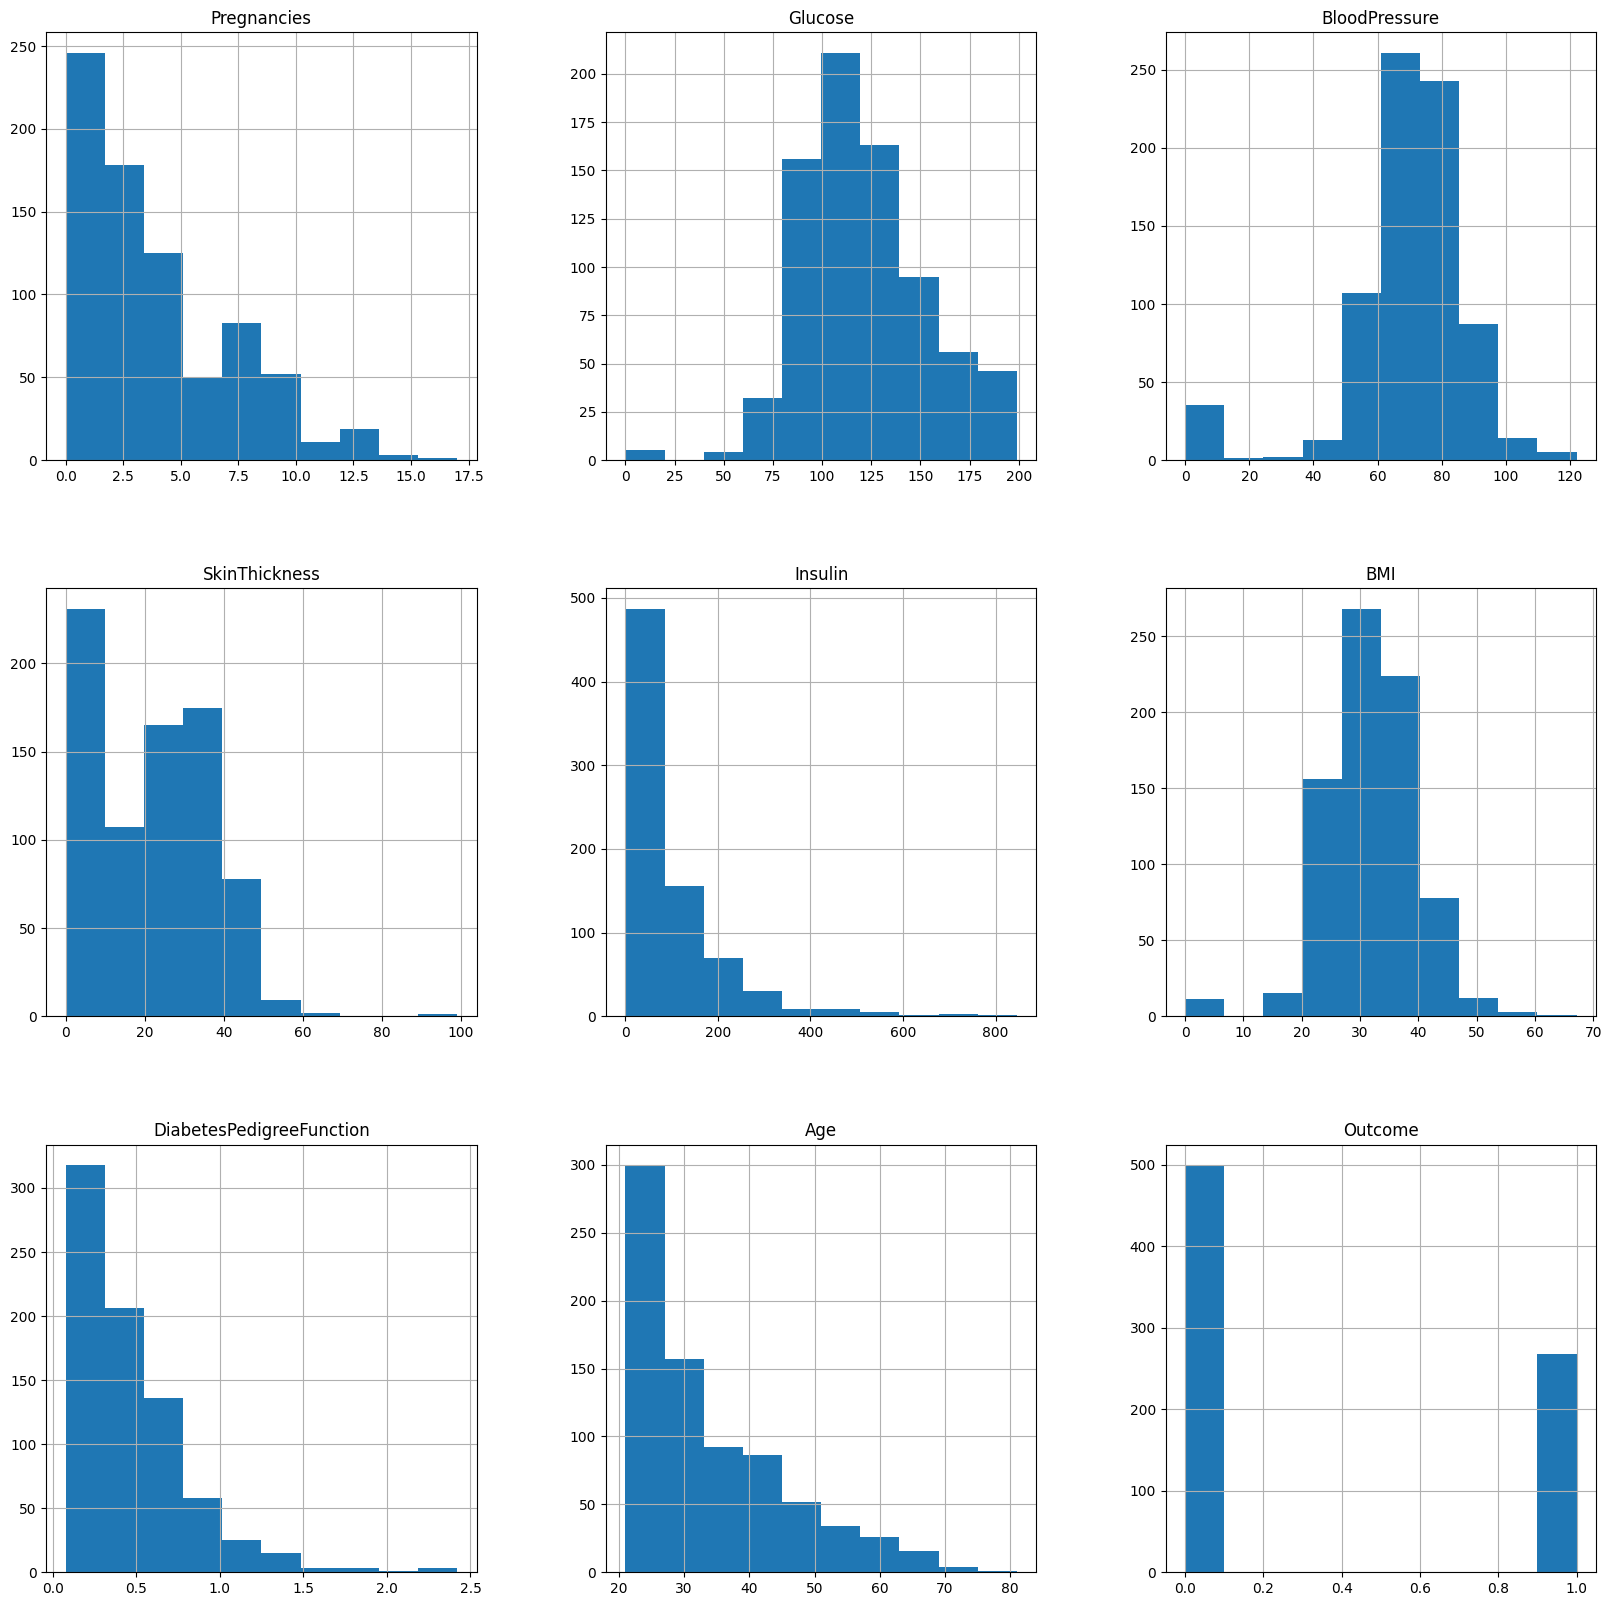

In [62]:
# Plotting the data distribution plots
p = diabetes.hist(figsize=(20, 20))

In [63]:
# Aiming to impute NAN values for the columns accordance with their distribution
diabetes_copy['Glucose'].fillna(diabetes_copy['Glucose'].mean(), inplace=True)
diabetes_copy['BloodPressure'].fillna(diabetes_copy['BloodPressure'].mean(), inplace=True)
diabetes_copy['SkinThickness'].fillna(diabetes_copy['SkinThickness'].median(), inplace=True)
diabetes_copy['Insulin'].fillna(diabetes_copy['Insulin'].median(), inplace=True)
diabetes_copy['BMI'].fillna(diabetes_copy['BMI'].median(), inplace=True)

<ipython-input-63-6078b2d07935>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes_copy['Glucose'].fillna(diabetes_copy['Glucose'].mean(), inplace=True)
<ipython-input-63-6078b2d07935>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [64]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


As it seems, this dataset is entirly numerical, so no need for a conversion

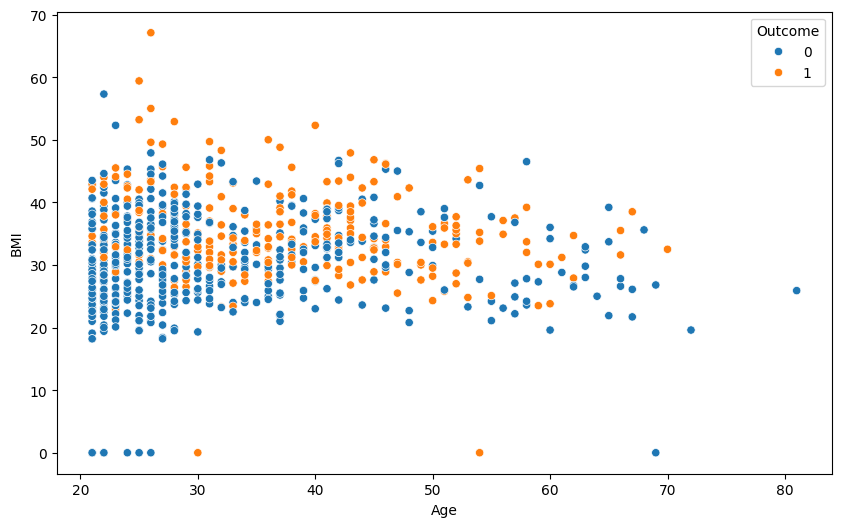

In [65]:
# Compare BMI to Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diabetes, x='Age', y='BMI', hue='Outcome')
plt.show()

By the scatterplot, higher BMI tends to have more probability of diagnosis with diabetes.

And while the age passes, the probability threshold decreases.

And as we can see, the data is more on the people between the age of 20 to 40-5.

In [66]:
# Split our data into X and y
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's standardize it to reduce the impact of outliers

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Pick a model, fit and predict

Now, let's pick an algorithm to train our model

In [68]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

# Define the function fit and score for each model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)

    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [69]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'Logistic Regression': 0.7532467532467533,
 'Decision Tree': 0.7467532467532467,
 'Random Forest': 0.7207792207792207,
 'Gradient Boosting': 0.7467532467532467,
 'Support Vector Machine': 0.7337662337662337,
 'K-Nearest Neighbors': 0.6948051948051948}

Our logistic regression model had the better score. Let's predict!

In [70]:
# Predict the model with Logistic Regression as the initial prediction
y_pred = models['Logistic Regression'].predict(X_test)

In [71]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

## Evaluating our model and Improvement

Now, it's time to evaluate our model and improve by tuning the hyperparameters

### Hyperparameter Tuning (GridSearchCV)

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define valid hyperparameters for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'max_iter': [100, 200, 300, 500],  # Maximum iterations
    'solver': ['liblinear', 'lbfgs'],  # Different solvers
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)  # Use scaled data

print(f"Best hyperparameters: {grid_search.best_params_}")
print(f'Best score: {grid_search.best_score_}')


Best hyperparameters: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
Best score: 0.7655071304811408


Not bad, from 75% to 76%. Let's go deeper and try other experiments.

### Feature Selection (SelectKBest)

Not all features contribute equally! Let's keep only the best features.

In [73]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

model = models['Logistic Regression']
model.fit(X_train_selected, y_train)
model.score(X_test_selected, y_test)

0.7532467532467533

Still not better. We should keep trying other algorithms and hyperparameters until we have a better result.

### Handle Class Imbalance (SMOTE)

Pima dataset has more non-diabetic cases than diabetic cases. Let's use SMOTE to balance the dataset.

In [74]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

Fit the model and take the score:

In [75]:
# Fit the model
model = models['Logistic Regression']

model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [76]:
model.score(X_test_selected, y_test)

0.7077922077922078

Not good at all!

Now Let's try feature selection (SelectKBest)

### Ensemble Model (Voting Classifer)

Combine models for a better result

In [77]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=500)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=5)),
    ('gb', GradientBoostingClassifier(n_estimators=100))
], voting='hard')

ensemble_model.fit(X_train, y_train)
print(f'Ensemble score: {ensemble_model.score(X_test, y_test)}')

Ensemble score: 0.7467532467532467


Now let's try our last chance on evaluating with more metrics (not just accuracy) and see if it improves the results.

### Evaluate with more matrics

Accuracy can be misleading. Use precision, recall, and F1-score

In [78]:
from sklearn.metrics import classification_report

y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [79]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1.0, max_iter=5000, random_state=42)
svc.fit(X_train, y_train)
print(f"Linear SVC Accuracy: {svc.score(X_test, y_test)}")

Linear SVC Accuracy: 0.7532467532467533


In [80]:
from sklearn.neighbors import KNeighborsClassifier

for i in range (1, 20):
  knn = KNeighborsClassifier(i)
  knn.fit(X_train, y_train)
  print(f"KNN Accuracy: {knn.score(X_test, y_test)}")

KNN Accuracy: 0.6233766233766234
KNN Accuracy: 0.6558441558441559
KNN Accuracy: 0.7077922077922078
KNN Accuracy: 0.7012987012987013
KNN Accuracy: 0.6948051948051948
KNN Accuracy: 0.7012987012987013
KNN Accuracy: 0.6818181818181818
KNN Accuracy: 0.7077922077922078
KNN Accuracy: 0.6818181818181818
KNN Accuracy: 0.6883116883116883
KNN Accuracy: 0.7077922077922078
KNN Accuracy: 0.7207792207792207
KNN Accuracy: 0.7077922077922078
KNN Accuracy: 0.7272727272727273
KNN Accuracy: 0.7207792207792207
KNN Accuracy: 0.7467532467532467
KNN Accuracy: 0.7532467532467533
KNN Accuracy: 0.7597402597402597
KNN Accuracy: 0.7597402597402597
